## Observations and Insights about the data analysis

### 1.  All data must be checked for integrity and cleaned, if necessary.  Duplicates or invalid values will affect your analysis and conclusions.
### 2.  Drug Regimen Capomulin had the lowest variance, std deviation and SEM for its study and is most likely the Drug Regimen with the most promising results in comparison to the other Drug Regimens.				
### 3.  It seems that Infubinol and Ceftamin are the least effective Drug Regimens to reduce the size of tumors according to their box plot figures versus Capomulin and Ramicane for their final Tumor volume sizes.  
### 4. Across all the Drug Regimens only Ceftamin had one outlier.  This points to good quality data across the study which can be used to draw conclusions with more certainty.

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata)
print(study_results)
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
#print(combined_df)
# Display the data table for preview
combined_df.head()

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].nunique()
print("Number of Mice: " + str(number_of_mice))


Number of Mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRows_DF = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse_id = duplicateRows_DF["Mouse ID"].unique().tolist()[0]
print("Duplicate Mouse ID: " + duplicate_mouse_id)

Duplicate Mouse ID: g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_clean_df = combined_df[combined_df["Mouse ID"] != duplicate_mouse_id]
combined_clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = combined_clean_df["Mouse ID"].nunique()
print("Number of Mice in clean DataFrame: " + str(number_of_mice_clean))

Number of Mice in clean DataFrame: 248


In [8]:
#Rechecking that there are no duplicates
duplicateRowsCheck_DF = combined_clean_df[combined_clean_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouseCheck_id = duplicateRowsCheck_DF["Mouse ID"].unique()
print("Duplicate Mouse ID: " + duplicate_mouseCheck_id)

[]


## Summary Statistics

In [9]:
combined_clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
TumorVol_Drug_group=combined_clean_df[["Drug Regimen","Tumor Volume (mm3)"]]
TumorVol_Drug_group_df=pd.DataFrame(TumorVol_Drug_group)

Tumor_volume_by_regimen_mean = TumorVol_Drug_group_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Tumor_volume_by_regimen_mean_df=pd.DataFrame(Tumor_volume_by_regimen_mean)
new_table_mean_df = Tumor_volume_by_regimen_mean_df.rename(columns={"Tumor Volume (mm3)":"Mean"})
#print(new_table_mean_df)

Tumor_volume_by_regimen_median = TumorVol_Drug_group_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_volume_by_regimen_median_df=pd.DataFrame(Tumor_volume_by_regimen_median)
new_table_median_df = Tumor_volume_by_regimen_median_df.rename(columns={"Tumor Volume (mm3)":"Median"})
#print(new_table_median_df)

Tumor_volume_by_regimen_var = TumorVol_Drug_group_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_volume_by_regimen_var_df=pd.DataFrame(Tumor_volume_by_regimen_var)
new_table_var_df = Tumor_volume_by_regimen_mean_df.rename(columns={"Tumor Volume (mm3)":"Variance"})
#print(new_table_var_df)

Tumor_volume_by_regimen_std = TumorVol_Drug_group_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_volume_by_regimen_std_df=pd.DataFrame(Tumor_volume_by_regimen_std)
new_table_std_df = Tumor_volume_by_regimen_std_df.rename(columns={"Tumor Volume (mm3)":"Std Dev."})
#print(new_table_std_df)

Tumor_volume_by_regimen_sem =TumorVol_Drug_group_df.groupby("Drug Regimen").sem()
Tumor_volume_by_regimen_sem_df=pd.DataFrame(Tumor_volume_by_regimen_sem)
new_table_sem_df = Tumor_volume_by_regimen_sem_df.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_statistics_df = pd.merge(new_table_mean_df,new_table_median_df, on="Drug Regimen",how="outer")
summary_statistics_df = pd.merge(summary_statistics_df,new_table_var_df, on="Drug Regimen",how="outer")
summary_statistics_df = pd.merge(summary_statistics_df,new_table_std_df, on="Drug Regimen",how="outer")
summary_statistics_df = pd.merge(summary_statistics_df,new_table_sem_df, on="Drug Regimen",how="outer")
summary_statistics_df

,Mean,Median,Variance,Std Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,40.675741,4.994774,0.329346
Ceftamin,52.591172,51.776157,52.591172,6.268188,0.469821
Infubinol,52.884795,51.820584,52.884795,6.567243,0.492236
Ketapril,55.235638,53.698743,55.235638,8.279709,0.603860
Naftisol,54.331565,52.509285,54.331565,8.134708,0.596466
Placebo,54.033581,52.288934,54.033581,7.821003,0.581331
Propriva,52.320930,50.446266,52.320930,6.622085,0.544332
Ramicane,40.216745,40.673236,40.216745,4.846308,0.320955
Stelasyn,54.233149,52.431737,54.233149,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
TumorVol_Drug_group_df.groupby("Drug Regimen").describe()


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

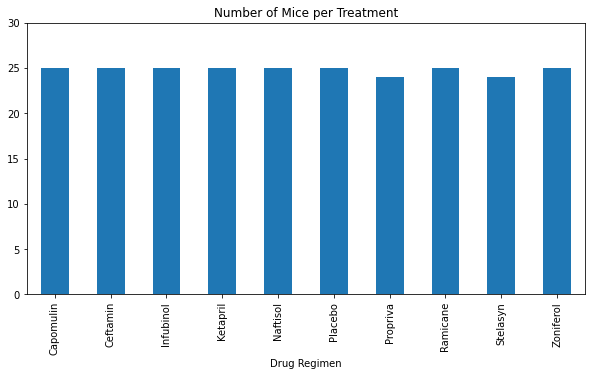

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Drug_mouse_group=combined_clean_df[["Drug Regimen","Mouse ID"]]
Drug_mouse_group_df=pd.DataFrame(Drug_mouse_group)
#print(Drug_mouse_group_df)
plt.ylim(0,30)
Drug_mouse_group_df.groupby("Drug Regimen")["Mouse ID"].nunique().plot(kind='bar', legend=False, figsize=(10,5), title='Number of Mice per Treatment')
plt.show()


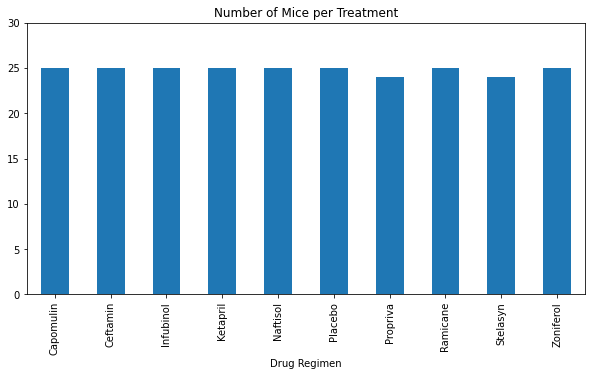

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

table_values=Drug_mouse_group_df.groupby("Drug Regimen")["Mouse ID"].nunique()
table_values_df = pd.DataFrame(table_values)
all_values = pd.Series(table_values_df.iloc[:,0])

plt.figure(figsize=(10,5))
plt.ylim(0,30)
all_values.plot.bar(title="Number of Mice per Treatment");
plt.show()


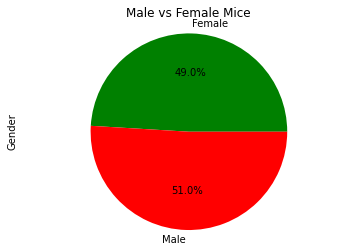

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_group=combined_clean_df[["Drug Regimen","Sex"]]
Gender_group_df=pd.DataFrame(Gender_group)
Gender_group_df = Gender_group_df.rename(columns={"Drug Regimen":"Gender"})
Gender_counts=Gender_group_df.groupby("Sex").count()

Gender_counts.plot.pie(y="Gender",legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.), \
                  shadow=False, startangle=0, title="Male vs Female Mice", colors = ["green", "red"]);
plt.axis('equal');

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_group=combined_clean_df[["Drug Regimen","Sex"]]
Gender_group_df=pd.DataFrame(Gender_group)
Gender_group_df = Gender_group_df.rename(columns={"Drug Regimen":"Count"})
gender_values=Gender_group_df.groupby("Sex").count()
gender_values_df= pd.DataFrame(gender_values)
gender_values_df.reset_index(inplace=True)
#print(gender_values_df)
gender_values_list=gender_values_df["Count"].tolist()
gender_labels=gender_values_df["Sex"].tolist()


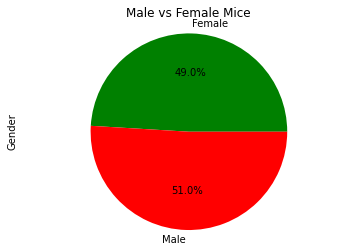

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["green","red"]
explode = (0,0)
plt.title('Male vs Female Mice')
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_values_list, explode=explode, labels=gender_labels, colors=colors, 
        autopct="%1.1f%%", shadow=False, startangle=0);
#Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Gender")

plt.show()



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse 
Columns=["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]
Final_Tumor_by_Regimens_df= combined_clean_df.loc[(combined_clean_df["Drug Regimen"] == "Capomulin") |
                                                (combined_clean_df["Drug Regimen"] == "Ramicane") |
                                                (combined_clean_df["Drug Regimen"] == "Infubinol") |
                                                (combined_clean_df["Drug Regimen"] == "Ceftamin"),Columns ]
Final_Tumor_by_Regimens_figures=Final_Tumor_by_Regimens_df.loc[Final_Tumor_by_Regimens_df.groupby(["Mouse ID"], sort=False)['Timepoint'].idxmax()][["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
#print(Final_Tumor_by_Regimens_figures)

Final_Tumor_figures_df = pd.DataFrame(Final_Tumor_by_Regimens_figures)
Final_Tumor_figures_last_df = Final_Tumor_figures_df[["Mouse ID","Tumor Volume (mm3)"]]

Final_Tumor_figures_last_df = Final_Tumor_figures_last_df.rename(columns={"Tumor Volume (mm3)":"Last Tumor Volume"})
Final_Tumor_figures_last_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_clean_df=pd.merge(combined_clean_df,Final_Tumor_figures_last_df,on="Mouse ID", how="outer")
combined_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1876,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1877,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1878,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
print(f"-----------------------------------------------------")

for i in range(len(Drug_list)):
    Drug_Regimen_final_figures_df = Final_Tumor_figures_df.loc[(Final_Tumor_figures_df["Drug Regimen"] == Drug_list[i])]
    quartiles = Drug_Regimen_final_figures_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The IQR & Outlier Stats for Drug Regimen: {Drug_list[i]} ")
    print(f"-----------------------------------------------------")
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The median of Tumor Volume is: {quartiles[0.5]} ")
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"-----------------------------------------------------")


-----------------------------------------------------
The IQR & Outlier Stats for Drug Regimen: Capomulin 
-----------------------------------------------------
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The median of Tumor Volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------
The IQR & Outlier Stats for Drug Regimen: Ramicane 
-----------------------------------------------------
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------
The IQR & Outlier Stat

In [19]:
# Put treatments into a list for for loop (and later for plot labels)  
combined_clean_list = combined_clean_df.values.tolist()
#print(combined_clean_list[100])
array_length = len(combined_clean_list)
#print(array_length)
#combined_clean_list
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list =[array_length]
#print(tumor_vol_data_list)
for i in range(array_length):
           tumor_vol_data_list.append(combined_clean_list[i])
  
# Determine outliers using upper and lower bounds & print them for each Drug Regimen

print(f"-----------------------------------------------------")

for i in range(len(Drug_list)):
    Drug_Regimen_final_figures_df = Final_Tumor_figures_df.loc[(Final_Tumor_figures_df["Drug Regimen"] == Drug_list[i])]
    quartiles = Drug_Regimen_final_figures_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"Outliers for Drug Regimen: {Drug_list[i]} ")
    print(f"-----------------------------------------------------")
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"-----------------------------------------------------")
    outlier_tumor_volume = Drug_Regimen_final_figures_df.loc[(Drug_Regimen_final_figures_df['Tumor Volume (mm3)'] < lower_bound) | (Drug_Regimen_final_figures_df['Tumor Volume (mm3)'] > upper_bound)]
    outlier_tumor_volume_df = pd.DataFrame(outlier_tumor_volume)
    print(outlier_tumor_volume)
    print(f"-----------------------------------------------------")

-----------------------------------------------------
Outliers for Drug Regimen: Capomulin 
-----------------------------------------------------
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []
-----------------------------------------------------
Outliers for Drug Regimen: Ramicane 
-----------------------------------------------------
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Timepoint, Tumor Volume (mm3)]
Index: []
-----------------------------------------------------
Outliers for Drug Regimen: Infubinol 
-----------------------------------------------------
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 cou

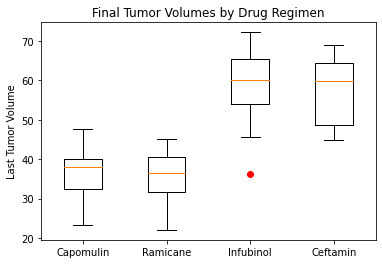

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin

Final_Tumor_figures_df = Final_Tumor_figures_df.rename(columns={"Tumor Volume (mm3)":"Last Tumor Volume"})

Final_Tumor_figures_Capomulin = Final_Tumor_figures_df.loc[(Final_Tumor_figures_df["Drug Regimen"] == "Capomulin")]["Last Tumor Volume"]
Final_Tumor_figures_Ramicane = Final_Tumor_figures_df.loc[(Final_Tumor_figures_df["Drug Regimen"] == "Ramicane")]["Last Tumor Volume"]
Final_Tumor_figures_Infubinol = Final_Tumor_figures_df.loc[(Final_Tumor_figures_df["Drug Regimen"] == "Infubinol")]["Last Tumor Volume"]
Final_Tumor_figures_Ceftamin = Final_Tumor_figures_df.loc[(Final_Tumor_figures_df["Drug Regimen"] == "Ceftamin")]["Last Tumor Volume"]

All_Tumor_figures= [Final_Tumor_figures_Capomulin, Final_Tumor_figures_Ramicane, Final_Tumor_figures_Infubinol, Final_Tumor_figures_Ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Last Tumor Volume')
ax1.set_title("Final Tumor Volumes by Drug Regimen")
labels=('Capomulin','Ramicane','Infubinol','Ceftamin')
ax1.boxplot(All_Tumor_figures, sym='ro', labels=labels);



## Line and Scatter Plots

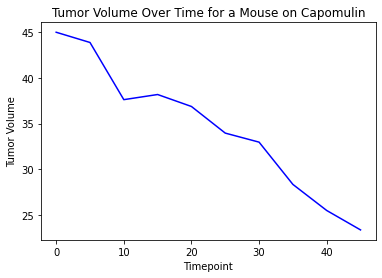

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Find a mouse treated wtih Capomulin
Mice_treated_with_Capomulin_df = combined_clean_df.loc[(combined_clean_df["Drug Regimen"] == "Capomulin")]
Specific_Mouse_treated_with_Capomulin = Mice_treated_with_Capomulin_df.groupby("Drug Regimen").first()
Specific_Mouse_treated_with_Capomulin_ID = Specific_Mouse_treated_with_Capomulin.iloc[0,0]
Specific_Mouse_treated_with_Capomulin_ID
# Get date for that mouse
Mouse_treated_with_Capomulin_df = combined_clean_df.loc[(combined_clean_df["Drug Regimen"] == "Capomulin") & 
                                                    (combined_clean_df["Mouse ID"] == Specific_Mouse_treated_with_Capomulin_ID)]
#Mouse_treated_with_Capomulin_df
mouse_tumor_vols = Mouse_treated_with_Capomulin_df["Tumor Volume (mm3)"]
mouse_timepoints = Mouse_treated_with_Capomulin_df["Timepoint"]
plt.title("Tumor Volume Over Time for a Mouse on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot(mouse_timepoints,mouse_tumor_vols, color="blue", label="Tumor Volumes");

In [22]:
# Determine Mouse Weights and Average Tumor Volumens over time, for Mice treated with Capomulin
Mice_treated_with_Capomulin_df
Ave_tumor_volume_by_Timepoint = Mice_treated_with_Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
Ave_mouse_weight_by_Timepoint = Mice_treated_with_Capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()


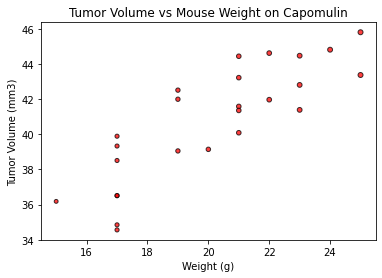

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.title("Tumor Volume vs Mouse Weight on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
#plt.plot(mouse_timepoints,mouse_tumor_vols, color="blue", label="Tumor Volumes");
data = Ave_tumor_volume_by_Timepoint
x_axis = Ave_mouse_weight_by_Timepoint
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);


## Correlation and Regression

The correlation coefficient between Mouse Weight and Tumor Volume is 0.84
The r-squared is: 0.7088568047708717


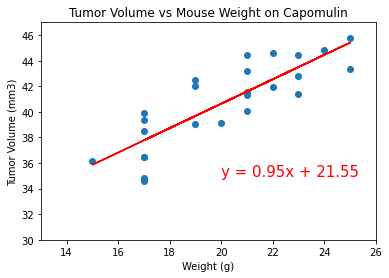

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Mouse Weight and Tumor Volume is {round(st.pearsonr(Ave_mouse_weight_by_Timepoint,Ave_tumor_volume_by_Timepoint)[0],2)}")

plt.title("Tumor Volume vs Mouse Weight on Capomulin")
x_values = Ave_mouse_weight_by_Timepoint
y_values = Ave_tumor_volume_by_Timepoint
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlim(13,26)
plt.ylim(30,47)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
